In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plot
import json
from fbprophet.serialize import model_to_json, model_from_json


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
davis_weather_df = pd.read_csv("cal_weather_df_davis.csv").drop(columns=["Time","type","obs","Wx","Wind dir","speed","dry","Bulb wet","ETo",'RH max',"min.2", "Evap", "none"])
davis_weather_df = davis_weather_df.rename(columns={'min':"Air Temp Min",'min.1':"Soil Temp Min", "Precip":"Precipitation", "Air max":"Air Temp Max", "Air min":"Air temp min", "Solar":"Solar Radiation"})
davis_weather_df['Date'] = pd.to_datetime(davis_weather_df['Date'].astype(str))

In [3]:
davis_weather_df.head()

,Station,Date,Precipitation,Air Temp Max,Air Temp Min,Soil max,Soil Temp Min,Solar Radiation
0,DAVIS.A,1982-01-01,0.10,52,33,49,47,143
1,DAVIS.A,1982-01-02,0.34,50,36,49,48,142
2,DAVIS.A,1982-01-03,0.00,44,30,49,47,141
3,DAVIS.A,1982-01-04,1.49,47,32,50,47,129
4,DAVIS.A,1982-01-05,2.56,49,38,49,47,158


In [4]:
print(davis_weather_df.shape)
print(davis_weather_df.dropna().shape)

(14716, 8)
(14716, 8)


In [5]:
features = ["Air Temp Min","Soil Temp Min", "Precipitation", "Air Temp Max", "Air Temp Min", "Solar Radiation"]
ylabels = {"Precipitation":"Inches", "Air Temp Max":"Fahrenheit", "Air Temp Min":"Fahrenheit", "Soil Temp Max":"Fahrenheit", "Soil Temp Min":"Fahrenheit", "Solar Radiation":"Langleys"}


In [6]:
def make_model(df, feature):
    data = zip(df['Date'], davis_weather_df[feature])
    prophet_df = pd.DataFrame(data, columns=['ds', 'y'])
    m = Prophet()
    m.fit(prophet_df)
    models[feature] = m
    return m

In [7]:
def save_model(model, feature):
    with open("models/" + feature + '_serialized_model.json', 'w') as fout:
        json.dump(model_to_json(model), fout)  # Save model

In [8]:
def load_model(feature):
    with open("models/" + feature + '_serialized_model.json', 'r') as fin:
        m = model_from_json(json.load(fin))  # Load model
        return m

In [9]:
models = {}
for feature in features:
    try:
        m = load_model(feature)
        models[feature] = m
        print("Successfully loaded model", feature)
    except:
        print("Couldn't load model", feature)
        m = make_model(davis_weather_df, feature)
        models[feature] = m
        save_model(m, feature)

C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\serialize.py:123: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\serialize.py:123: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))


Successfully loaded model Air Temp Min
Successfully loaded model Soil Temp Min
Successfully loaded model Precipitation


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\serialize.py:123: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\serialize.py:123: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))


Successfully loaded model Air Temp Max


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\serialize.py:123: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))


Successfully loaded model Air Temp Min
Successfully loaded model Solar Radiation


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\serialize.py:123: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))


In [41]:
def make_fig(model, lookahead, title, ylabel, start=None, save=True):
    if lookahead <= 0 or start:
        old_history = model.history
    if lookahead >= 0:
        future = model.make_future_dataframe(periods=lookahead * 365)
        print(future.tail())
        forecast = model.predict(future)
    else:
        hist = model.history
        first_day = hist['ds'].iloc[0]
        last_day = model.history['ds'].iloc[-1] - pd.Timedelta(days=np.abs(lookahead * 365))
        print(len(hist))
        future = hist[(hist['ds'] >= first_day) & (hist['ds'] <= last_day)]
        print(len(future))
        print(future.tail())
        forecast = model.predict(future)
        model.history = model.history[(model.history['ds'] <= last_day)]
    if start:
        start_dt = pd.to_datetime("01/01/" + str(start))
        forecast = forecast[(forecast['ds'] >= start_dt)]
        model.history = model.history[(model.history['ds'] >= start_dt)]
        
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    print(title)
    fig1 = model.plot(forecast, xlabel='Date', ylabel=ylabel)
    fig1.suptitle(title)
    fig2 = model.plot_components(forecast)
    if start:
        model.history = old_history
    if save:
        save_fig(fig1, fig2, title)
    return fig1, fig2

In [11]:
def save_fig(fig1, fig2, name):
    fig1.savefig("plots/" + name + '.jpg')
    fig2.savefig("plots/" + name + '_trends' + '.jpg')

              ds   y  floor         t  y_scaled
0     1982-01-01  33      0  0.000000  0.428571
1     1982-01-02  36      0  0.000068  0.467532
2     1982-01-03  30      0  0.000136  0.389610
3     1982-01-04  32      0  0.000204  0.415584
4     1982-01-05  38      0  0.000272  0.493506
...          ...  ..    ...       ...       ...
14711 2022-04-12  45      0  0.999728  0.584416
14712 2022-04-13  44      0  0.999796  0.571429
14713 2022-04-14  44      0  0.999864  0.571429
14714 2022-04-15  44      0  0.999932  0.571429
14715 2022-04-16  45      0  1.000000  0.584416

[14716 rows x 5 columns]
              ds
15076 2023-04-12
15077 2023-04-13
15078 2023-04-14
15079 2023-04-15
15080 2023-04-16


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


              ds       yhat  yhat_lower  yhat_upper
15076 2023-04-12  45.682871   39.109741   52.392255
15077 2023-04-13  45.622374   38.685579   52.564803
15078 2023-04-14  45.670132   39.294947   52.909368
15079 2023-04-15  45.913169   39.050717   52.869742
15080 2023-04-16  46.177944   39.771687   52.699364
Air Temp Min


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


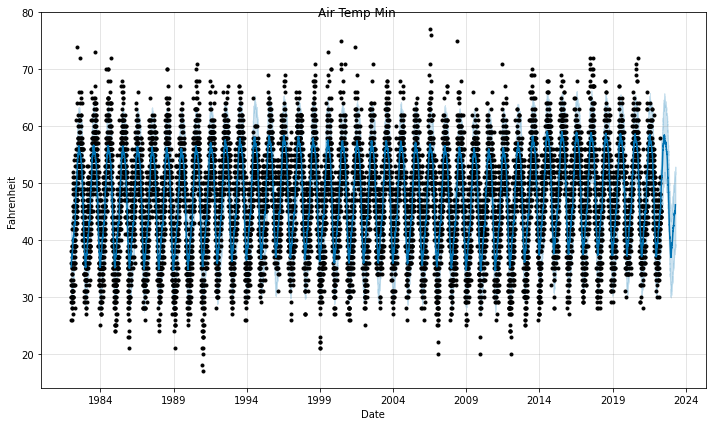

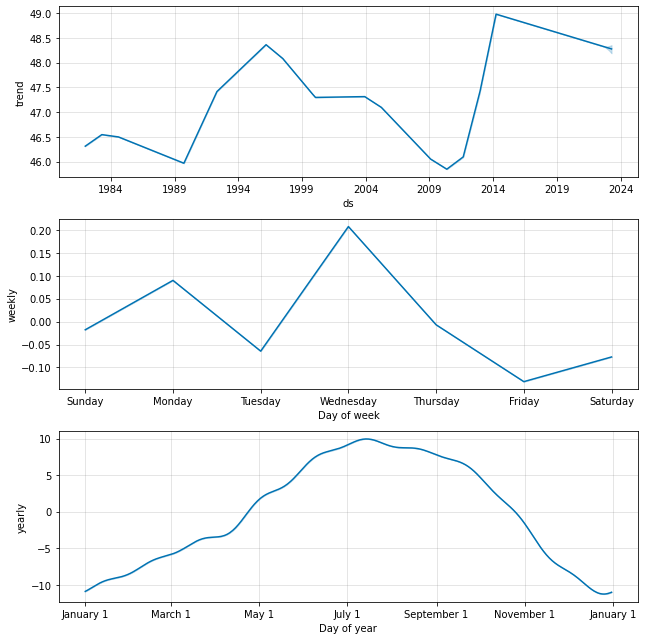





              ds   y  floor         t  y_scaled
0     1982-01-01  47      0  0.000000  0.552941
1     1982-01-02  48      0  0.000068  0.564706
2     1982-01-03  47      0  0.000136  0.552941
3     1982-01-04  47      0  0.000204  0.552941
4     1982-01-05  47      0  0.000272  0.552941
...          ...  ..    ...       ...       ...
14711 2022-04-12  56      0  0.999728  0.658824
14712 2022-04-13  57      0  0.999796  0.670588
14713 2022-04-14  57      0  0.999864  0.670588
14714 2022-04-15  57      0  0.999932  0.670588
14715 2022-04-16  58      0  1.000000  0.682353

[14716 rows x 5 columns]
              ds
15076 2023-04-12
15077 2023-04-13
15078 2023-04-14
15079 2023-04-15
15080 2023-04-16


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


              ds       yhat  yhat_lower  yhat_upper
15076 2023-04-12  54.498101   50.648083   57.881445
15077 2023-04-13  54.678159   50.833438   58.537335
15078 2023-04-14  54.828761   50.822608   58.647868
15079 2023-04-15  55.186629   51.533738   58.945014
15080 2023-04-16  55.425776   51.626730   58.944345
Soil Temp Min


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


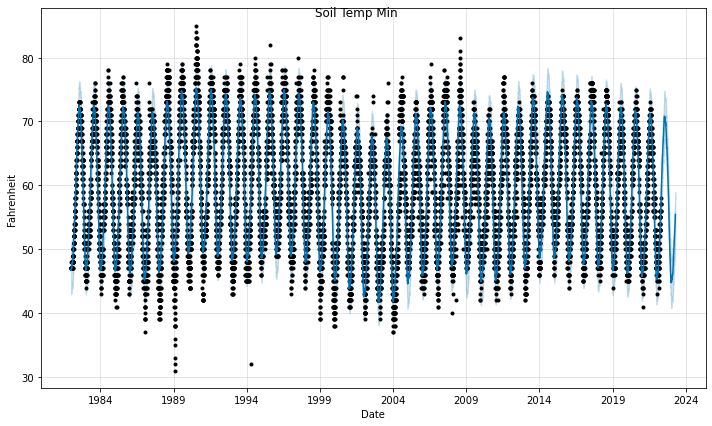

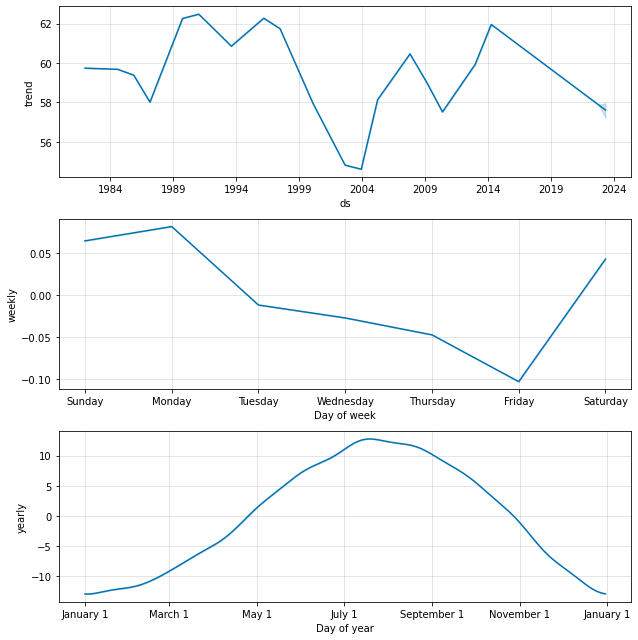





              ds     y  floor         t  y_scaled
0     1982-01-01  0.10      0  0.000000  0.034247
1     1982-01-02  0.34      0  0.000068  0.116438
2     1982-01-03  0.00      0  0.000136  0.000000
3     1982-01-04  1.49      0  0.000204  0.510274
4     1982-01-05  2.56      0  0.000272  0.876712
...          ...   ...    ...       ...       ...
14711 2022-04-12  0.10      0  0.999728  0.034247
14712 2022-04-13  0.02      0  0.999796  0.006849
14713 2022-04-14  0.04      0  0.999864  0.013699
14714 2022-04-15  0.00      0  0.999932  0.000000
14715 2022-04-16  0.03      0  1.000000  0.010274

[14716 rows x 5 columns]
              ds
15076 2023-04-12
15077 2023-04-13
15078 2023-04-14
15079 2023-04-15
15080 2023-04-16


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


              ds      yhat  yhat_lower  yhat_upper
15076 2023-04-12  0.019093   -0.206530    0.252789
15077 2023-04-13  0.017182   -0.216473    0.252514
15078 2023-04-14  0.016452   -0.201838    0.250704
15079 2023-04-15  0.020114   -0.194814    0.270581
15080 2023-04-16  0.019793   -0.212946    0.253489
Precipitation


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


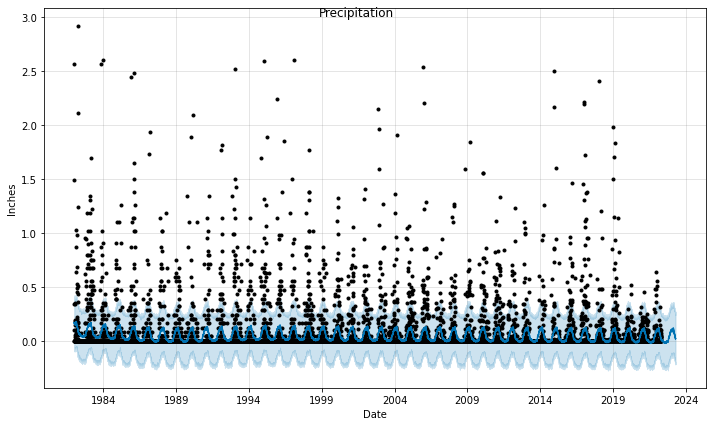

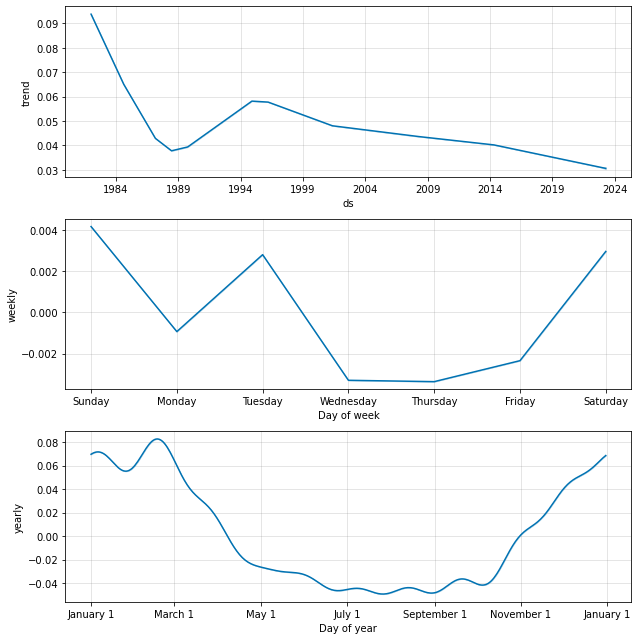





              ds   y  floor         t  y_scaled
0     1982-01-01  52      0  0.000000  0.460177
1     1982-01-02  50      0  0.000068  0.442478
2     1982-01-03  44      0  0.000136  0.389381
3     1982-01-04  47      0  0.000204  0.415929
4     1982-01-05  49      0  0.000272  0.433628
...          ...  ..    ...       ...       ...
14711 2022-04-12  72      0  0.999728  0.637168
14712 2022-04-13  74      0  0.999796  0.654867
14713 2022-04-14  72      0  0.999864  0.637168
14714 2022-04-15  70      0  0.999932  0.619469
14715 2022-04-16  71      0  1.000000  0.628319

[14716 rows x 5 columns]
              ds
15076 2023-04-12
15077 2023-04-13
15078 2023-04-14
15079 2023-04-15
15080 2023-04-16


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


              ds       yhat  yhat_lower  yhat_upper
15076 2023-04-12  72.226298   62.654791   80.933164
15077 2023-04-13  72.318069   62.729826   81.547009
15078 2023-04-14  72.640851   63.777274   81.065003
15079 2023-04-15  72.802239   63.466589   81.770736
15080 2023-04-16  73.203255   64.207061   81.525164
Air Temp Max


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


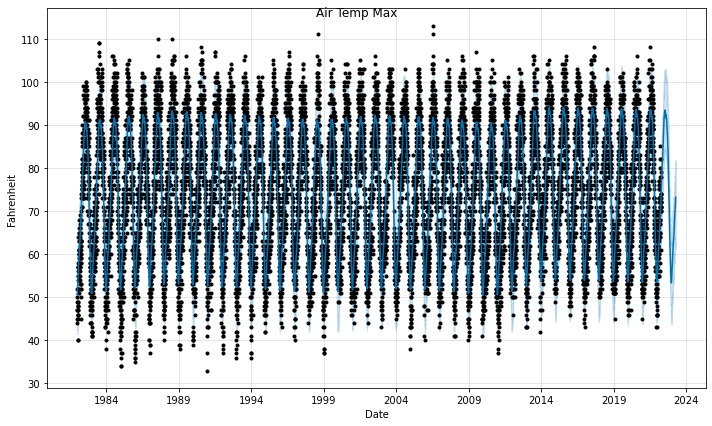

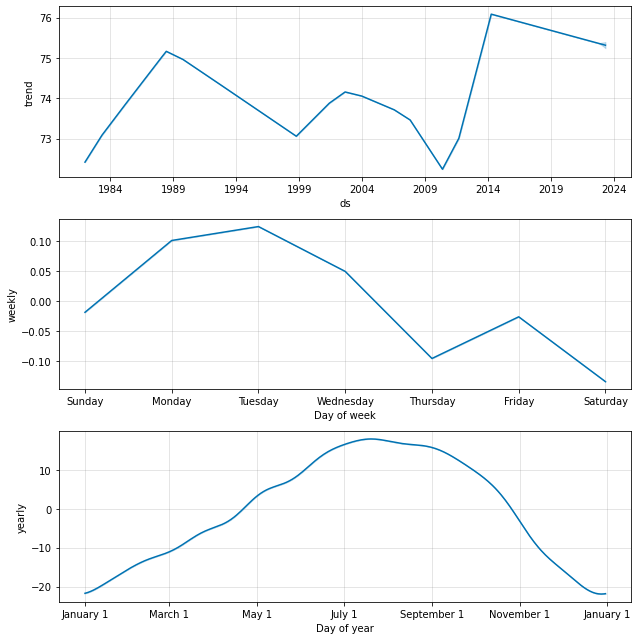





              ds    y  floor         t  y_scaled
0     1982-01-01  143      0  0.000000  0.169632
1     1982-01-02  142      0  0.000068  0.168446
2     1982-01-03  141      0  0.000136  0.167260
3     1982-01-04  129      0  0.000204  0.153025
4     1982-01-05  158      0  0.000272  0.187426
...          ...  ...    ...       ...       ...
14711 2022-04-12  469      0  0.999728  0.556346
14712 2022-04-13  530      0  0.999796  0.628707
14713 2022-04-14  517      0  0.999864  0.613286
14714 2022-04-15  498      0  0.999932  0.590747
14715 2022-04-16  456      0  1.000000  0.540925

[14716 rows x 5 columns]
              ds
15076 2023-04-12
15077 2023-04-13
15078 2023-04-14
15079 2023-04-15
15080 2023-04-16


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


              ds        yhat  yhat_lower  yhat_upper
15076 2023-04-12  510.352117  400.746748  620.851547
15077 2023-04-13  515.434489  412.994043  629.882456
15078 2023-04-14  515.468639  408.471006  617.107443
15079 2023-04-15  517.884561  406.112137  620.436317
15080 2023-04-16  522.751947  411.642805  636.753803
Solar Radiation


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


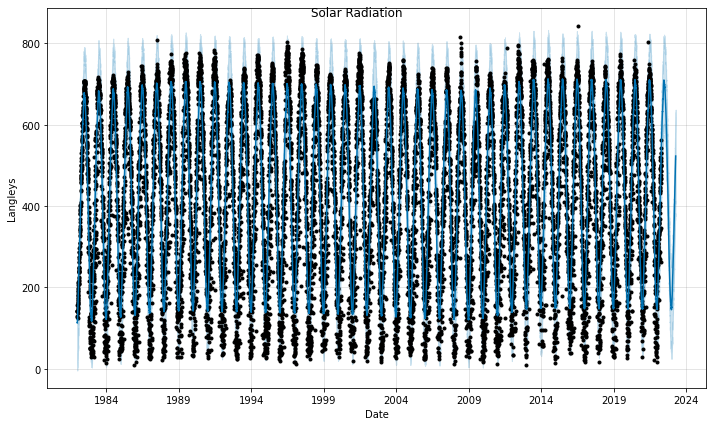

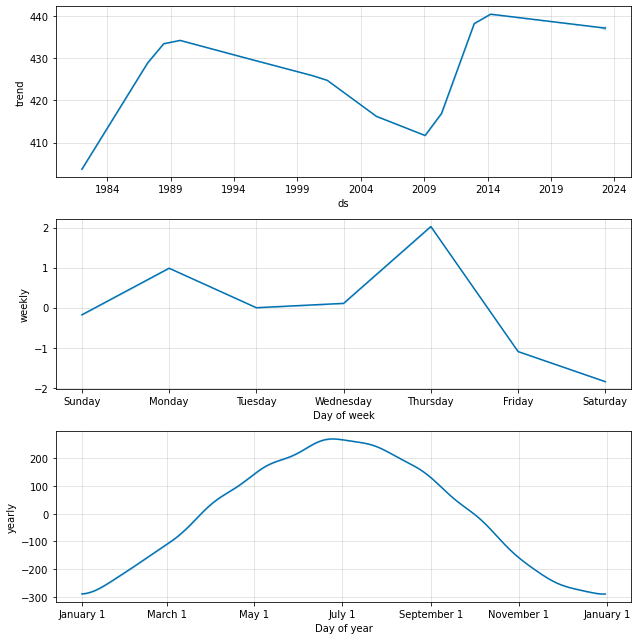

In [12]:
lookahead=1
for key in models.keys():
    m = models[key]
    print(m.history)
    make_fig(m, lookahead, key, ylabels[key])
    plot.show()
    print('\n\n\n')

In [13]:
yolo_weather_df = pd.read_csv("ad_viz_tile_data.csv")
yolo_weather_df['Date'] = pd.to_datetime(yolo_weather_df['Date'].astype(str))

In [14]:
yolo_weather_df.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,1980-01-01,23,CO,NaN,06-113-1002,AQS
1,1980-01-02,18,CO,NaN,06-113-1002,AQS
2,1980-01-03,20,CO,NaN,06-113-1002,AQS
3,1980-01-04,17,CO,NaN,06-113-1002,AQS
4,1980-01-05,17,Ozone,NaN,06-113-1002,AQS


In [27]:
data = zip(yolo_weather_df['Date'], yolo_weather_df[" AQI Value"])
prophet_df = pd.DataFrame(data, columns=['ds', 'y'])
#yolo_m = Prophet()
#yolo_m.fit(prophet_df)
feature = "AQI Value"
try:
    yolo_m = load_model(feature)
    print("Successfully loaded model", feature)
except:
    print("Couldn't load model", feature)
    yolo_m = Prophet()
    yolo_m.fit(prophet_df)
    save_model(yolo_m, feature)

Successfully loaded model AQI Value


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\serialize.py:123: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(attr_dict[attribute]))


             ds
9633 2006-12-27
9634 2006-12-28
9635 2006-12-29
9636 2006-12-30
9637 2006-12-31


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


             ds       yhat  yhat_lower  yhat_upper
9633 2006-12-27  33.845350    2.680723   63.884542
9634 2006-12-28  34.178383    3.947395   65.846081
9635 2006-12-29  34.253154    4.028659   64.788122
9636 2006-12-30  35.049937    2.572605   65.137894
9637 2006-12-31  33.495316    4.440501   66.169167
AQI Value


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


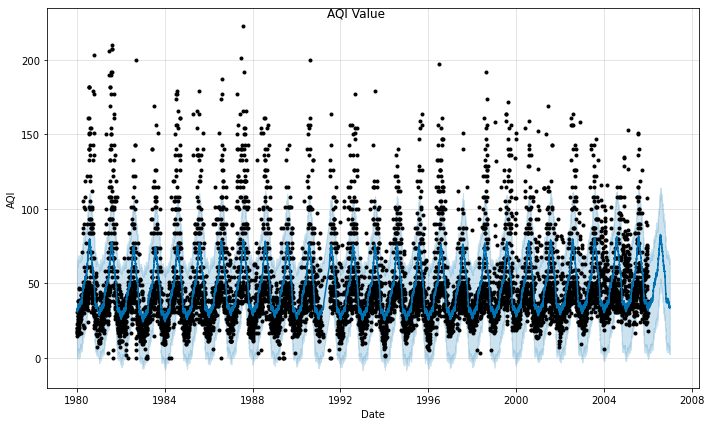

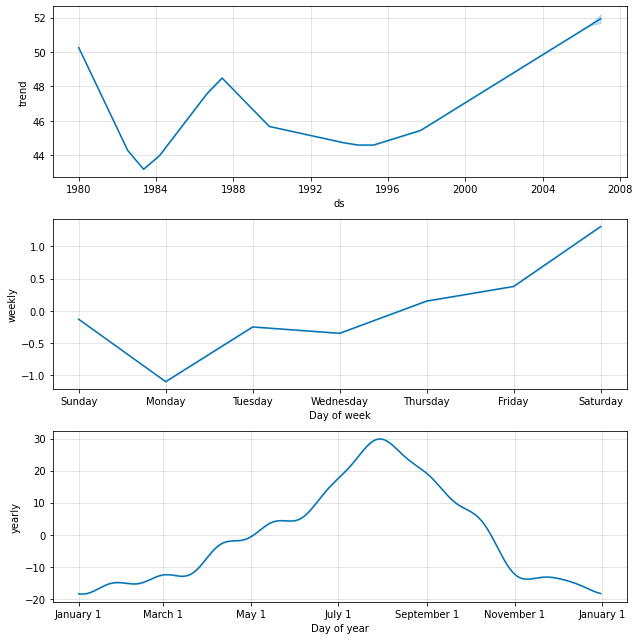

In [30]:
fig1, fig2 = make_fig(yolo_m, lookahead, "AQI Value", "AQI")
#save_fig(fig1, fig2, "AQI.jpg")
plot.show()

             ds
9633 2006-12-27
9634 2006-12-28
9635 2006-12-29
9636 2006-12-30
9637 2006-12-31


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


             ds       yhat  yhat_lower  yhat_upper
9633 2006-12-27  33.845350    2.979825   63.250414
9634 2006-12-28  34.178383    3.183050   65.565689
9635 2006-12-29  34.253154    3.553286   64.404884
9636 2006-12-30  35.049937    3.729071   64.958287
9637 2006-12-31  33.495316    3.578301   63.768869
AQI Value


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


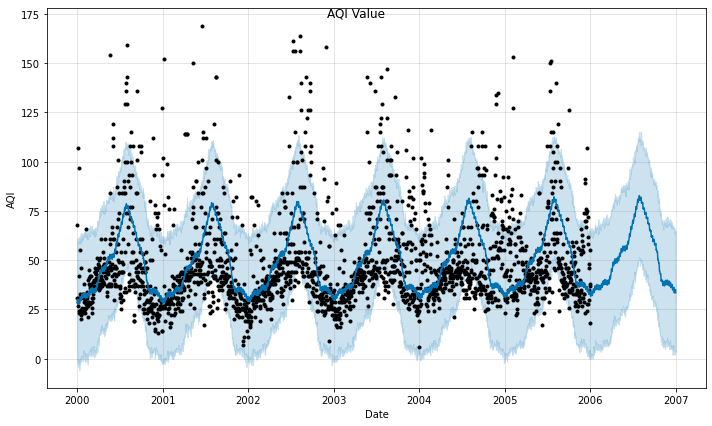

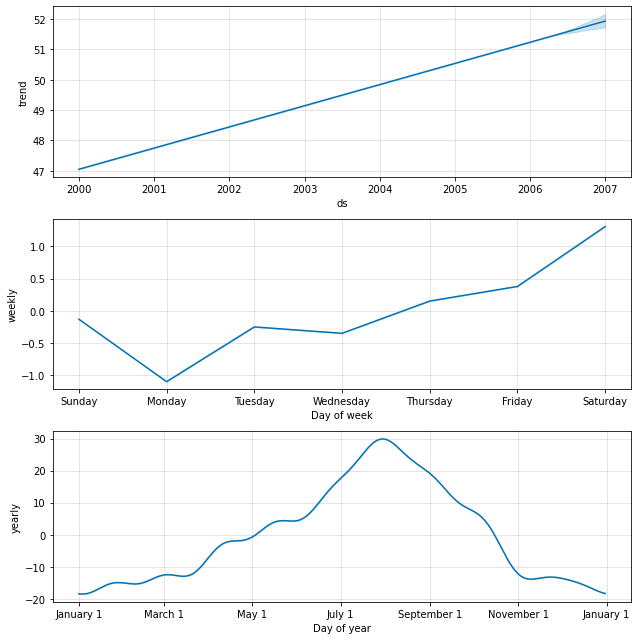

In [43]:
fig1, fig2 = make_fig(yolo_m, lookahead, "AQI Value", "AQI", start=2000)


9273
8908
             ds   y  floor         t  y_scaled
8903 2004-12-27  42      0  0.961142  0.188341
8904 2004-12-28  33      0  0.961247  0.147982
8905 2004-12-29  55      0  0.961352  0.246637
8906 2004-12-30  30      0  0.961457  0.134529
8907 2004-12-31  31      0  0.961563  0.139013


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


             ds       yhat  yhat_lower  yhat_upper
8903 2004-12-27  31.612906    1.048303   61.415338
8904 2004-12-28  32.303157    2.441077   63.961297
8905 2004-12-29  32.060182    3.394059   60.894138
8906 2004-12-30  32.437282    2.676727   64.359135
8907 2004-12-31  32.562889    3.248527   62.777515
AQI Value


C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\User\Anaconda3\envs\fbprophet\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


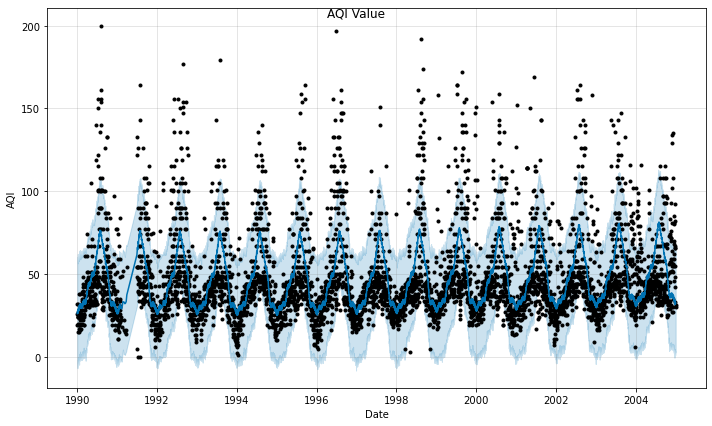

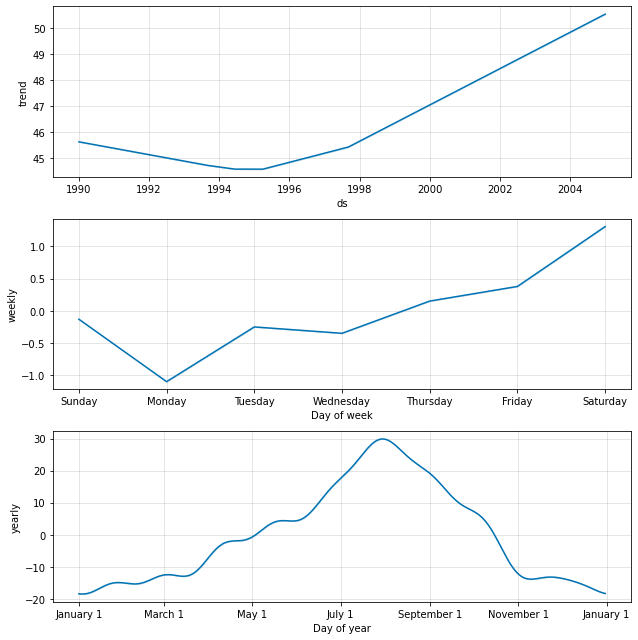

In [42]:
fig1, fig2 = make_fig(yolo_m, -1, "AQI Value", "AQI", start=1990)
